In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
import matplotlib.pyplot as plt
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten
from torchvision.datasets import ImageFolder
from google.colab import drive
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
from torchvision import datasets
from sklearn.metrics import classification_report
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision.datasets import KMNIST
from torch.optim import Adam
from torch import nn
import matplotlib.pyplot as plt
import argparse
import time
import pandas as pd
from torchsummary import summary

In [ ]:
from torch.functional import Tensor
%cd /content/drive/MyDrive/552_project
data_dir='/content/drive/MyDrive/552_project/images'
temp_data = datasets.ImageFolder(data_dir, transform= transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))
angles= pd.read_excel('/content/drive/MyDrive/552_project/angles.xlsx')
angle_speed_data=[]
for i in range(len(angles[0])):
  if i!=len(angles[0])-1:
    angle_speed_data.append([angles[0][i]])
  else:
    angle_speed_data.append([angles[0][i]])
angle_speed_data=Tensor(angle_speed_data)

data=[]
count=0
for x,y in temp_data:
  if count==0:
    print(x.size())
    count+=1
  else:
    break
for i in range(len(temp_data)):
  data.append([temp_data[i][0],angle_speed_data[i]])






/content/drive/MyDrive/552_project
torch.Size([3, 150, 150])


In [ ]:
INIT_LR = 1e-3
BATCH_SIZE = 16
EPOCHS = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_size = int(0.7 * (len(data)-2))
valid_size = int(0.1 * (len(data)-2))
test_size = len(data) - train_size - valid_size-2
train_dataset, test_dataset, valid_dataset = torch.utils.data.random_split(data[2:len(data)], [train_size, test_size, valid_size])
trainDataLoader = DataLoader(train_dataset, shuffle=True,
	batch_size=BATCH_SIZE)
valDataLoader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)
testDataLoader = DataLoader(test_dataset, batch_size=BATCH_SIZE)
# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE

In [ ]:
class LeNet(Module):
	def __init__(self, numChannels, regressors):
		# call the parent constructor
		super(LeNet, self).__init__()
		# initialize first set of CONV => RELU => POOL layers
		self.conv1 = Conv2d(in_channels=numChannels, out_channels=20,
			kernel_size=(5, 5))
		self.relu1 = ReLU()
		self.maxpool1 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		# initialize second set of CONV => RELU => POOL layers
		self.conv2 = Conv2d(in_channels=20, out_channels=50,
			kernel_size=(5, 5))
		self.relu2 = ReLU()
		self.maxpool2 = MaxPool2d(kernel_size=(4, 4), stride=(4, 4))
		# initialize first (and only) set of FC => RELU layers
		self.fc1 = Linear(in_features=800, out_features=500)
		self.relu3 = ReLU()
		self.fc2 = Linear(in_features=500, out_features=200)
		self.relu3 = ReLU()
		# initialize our softmax classifier
		self.fc3 = Linear(in_features=200, out_features=regressors)
		#self.logSoftmax = LogSoftmax(dim=1)
	def forward(self, x):
			# pass the input through our first set of CONV => RELU =>
			# POOL layers
			x = self.conv1(x)
			x = self.relu1(x)
			x = self.maxpool1(x)
			#x = self.maxpool1(x)
			# pass the output from the previous layer through the second
			# set of CONV => RELU => POOL layers
			x = self.conv2(x)
			x = self.relu2(x)
			#x = self.maxpool2(x)
			#x = self.maxpool2(x)
			x = self.maxpool2(x)
			x = self.maxpool2(x)
			# flatten the output from the previous layer and pass it
			# through our only set of FC => RELU layers
			x = flatten(x, 1)
			x = self.fc1(x)
			x = self.relu3(x)
			# pass the output to our softmax classifier to get our output
			# predictions
			x = self.fc2(x)
			x = self.relu3(x)
			x = self.fc3(x)
			output = x
			return output

In [ ]:
# initialize the LeNet model
print("[INFO] initializing the LeNet model...")
model = LeNet(
	numChannels=3,
	regressors=1).to(device)
summary(model,(3,150,150))
# initialize our optimizer and loss function
opt = Adam(model.parameters(), lr=INIT_LR, weight_decay=1e-3)
lossFn = nn.MSELoss()
# initialize a dictionary to store training history
H = {
	"train_loss": [],
	"val_loss": []
}
# measure how long training is going to take
print("[INFO] training the network...")
startTime = time.time()

[INFO] initializing the LeNet model...
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 20, 146, 146]           1,520
              ReLU-2         [-1, 20, 146, 146]               0
         MaxPool2d-3           [-1, 20, 73, 73]               0
            Conv2d-4           [-1, 50, 69, 69]          25,050
              ReLU-5           [-1, 50, 69, 69]               0
         MaxPool2d-6           [-1, 50, 17, 17]               0
         MaxPool2d-7             [-1, 50, 4, 4]               0
            Linear-8                  [-1, 500]         400,500
              ReLU-9                  [-1, 500]               0
           Linear-10                  [-1, 200]         100,200
             ReLU-11                  [-1, 200]               0
           Linear-12                    [-1, 1]             201
Total params: 527,471
Trainable params: 527,471
Non-trainable pa

train

In [ ]:
pred_two_frame = []
H = {
		"train_loss": [],
		"val_loss": []
	}
test_loss=[0 for i in range(5)]
for run in range(5):
	# initialize the LeNet model
	print("[INFO] initializing the LeNet model...")
	model = LeNet(
		numChannels=3,
		regressors=1).to(device)
	# initialize our optimizer and loss function
	opt = Adam(model.parameters(), lr=INIT_LR, weight_decay=1e-2)
	lossFn = nn.MSELoss()
	# initialize a dictionary to store training history
	
	# measure how long training is going to take
	print("[INFO] training the network...")
	startTime = time.time()	
 
	# loop over our epochs
	for e in range(0, EPOCHS):
		# set the model in training mode
		model.train()
		# initialize the total training and validation loss
		totalTrainLoss = 0
		totalValLoss = 0
		# loop over the training set
		for (x, y) in trainDataLoader:
			# send the input to the device
			#(x, y) = (x.to(device), y.to(device))
			# perform a forward pass and calculate the training loss
			pred = model(x)
			loss = lossFn(pred, y)
			# zero out the gradients, perform the backpropagation step,
			# and update the weights
			opt.zero_grad()
			loss.backward()
			opt.step()
			# add the loss to the total training loss so far and
			# calculate the number of correct predictions
			totalTrainLoss += loss

		# switch off autograd for evaluation
		with torch.no_grad():
			# set the model in evaluation mode
			model.eval()
			# loop over the validation set
			for (x, y) in valDataLoader:
				pred=model(x)
							# send the input to the device
							#(x, y) = (x.to(device), y.to(device))
							# make the predictions and calculate the validation loss
				#print(pred2)
				totalValLoss += lossFn(pred, y)

		# calculate the average training and validation loss
		avgTrainLoss = totalTrainLoss / trainSteps
		avgValLoss = totalValLoss / valSteps
		# update our training history
		if len(H["train_loss"])!=EPOCHS:
			H["train_loss"].append([avgTrainLoss.cpu().detach().numpy()])
			H["val_loss"].append([avgValLoss.cpu().detach().numpy()])
		else:
			H["train_loss"][e].append(avgTrainLoss.cpu().detach().numpy())
			H["val_loss"][e].append(avgValLoss.cpu().detach().numpy())
		# print the model training and validation information
		print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))
		print("Train loss: {:.6f}".format(
			avgTrainLoss))
		print("Val loss: {:.6f}\n".format(
			avgValLoss))
	
	# finish measuring how long training took
	endTime = time.time()
	print("[INFO] total time taken to train the model: {:.2f}s".format(
		endTime - startTime))
	# we can now evaluate the network on the test set
	print("[INFO] evaluating network...")
	# turn off autograd for testing evaluation
	with torch.no_grad():
		# set the model in evaluation mode
		model.eval()
		
		# initialize a list to store our predictions
		preds = []
		# loop over the test set
		totalTestLoss=0
		for (x, y) in testDataLoader:
			# send the input to the device
			#x = x.to(device)
			# make the predictions and add them to the list
			pred = model(x)
			preds.extend(pred)
			totalTestLoss += lossFn(pred, y)
		
		totalTestLoss=totalTestLoss/len(testDataLoader)
		test_loss[run]=totalTestLoss
	 
	two_frames=DataLoader(data[0:2], batch_size=BATCH_SIZE)
	
	with torch.no_grad():
		# set the model in evaluation mode
		model.eval()
		
		# initialize a list to store our predictions
		
		# loop over the test set
		for (x,y) in two_frames:
			# send the input to the device
			#x = x.to(device)
			# make the predictions and add them to the list
			pred = model(x)
			pred_two_frame.extend(pred)


[INFO] initializing the LeNet model...
[INFO] training the network...
[INFO] EPOCH: 1/10
Train loss: 81.476158
Val loss: 23.897768

[INFO] EPOCH: 2/10
Train loss: 12.078143
Val loss: 8.562062

[INFO] EPOCH: 3/10
Train loss: 4.186452
Val loss: 4.701310

[INFO] EPOCH: 4/10
Train loss: 2.229244
Val loss: 1.039547

[INFO] EPOCH: 5/10
Train loss: 0.687693
Val loss: 0.558098



KeyboardInterrupt: ignored

In [ ]:
pred1=0
pred2=0
for i,pred in enumerate(pred_two_frame):
  if i%2==0:
    pred1+=pred
  else:
    pred2+=pred
pred1=pred1/5
pred2=pred2/5
print(pred1,pred2)


tensor([0.8102]) tensor([1.5646])


In [ ]:
train_loss=[0 for i in range(EPOCHS)]
std_train=[0 for i in range(EPOCHS)]
for epoch in range(EPOCHS):
  for run in range(5):
    train_loss[epoch]+=H["train_loss"][epoch][run]
  train_loss[epoch]=train_loss[epoch]/5
for epoch in range(EPOCHS):
  for run in range(5):
    std_train[epoch]+=(H["train_loss"][epoch][run]-train_loss[epoch])**2
  std_train[epoch]=std_train[epoch]/5

valid_loss=[0 for i in range(EPOCHS)]
std_valid=[0 for i in range(EPOCHS)]
for epoch in range(EPOCHS):
  for run in range(5):
    valid_loss[epoch]+=H["val_loss"][epoch][run]
  valid_loss[epoch]=valid_loss[epoch]/5
for epoch in range(EPOCHS):
  for run in range(5):
    std_valid[epoch]+=(H["val_loss"][epoch][run]-valid_loss[epoch])**2
  std_valid[epoch]=std_valid[epoch]/5



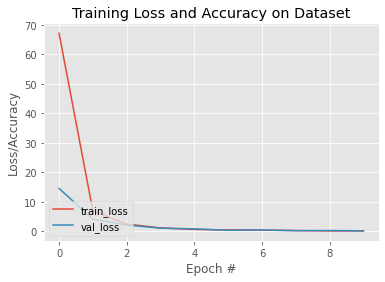

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
#plt.plot(H["train_loss"], label="train_loss")
plt.plot(train_loss, label="train_loss")
#plt.plot(H["val_loss"], label="val_loss")
plt.plot(valid_loss, label="val_loss")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
mean_test_loss=0
for i in range(len(test_loss)):
  mean_test_loss+=test_loss[i]
mean_test_loss=mean_test_loss/len(test_loss)

std_test_loss=0
for i in range(len(test_loss)):
  std_test_loss+=(test_loss[i]-mean_test_loss)**2
std_test_loss=std_test_loss/len(test_loss)

print('test loss=',mean_test_loss.tolist(),'+-',std_test_loss.tolist())


test loss={0:.4f} 0.1277872771024704 +- 0.0008195413975045085
